In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
import cv2
import os

In [2]:
from tensorflow.keras.preprocessing import image
# InceptionV3 is an image recognition model by GoogLeNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
train2=os.listdir("dermnet/train")

In [4]:
train2

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [5]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [6]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [7]:
def data_dictionary():
    path_train="skin/train/"
    path_test="dermnet/train/"
    list_train=cat
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="skin/train/Normal/34.avif":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [8]:
train=data_dictionary()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7330 non-null   object
 1   target      7330 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.7+ KB


In [11]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))

        images.append(img)

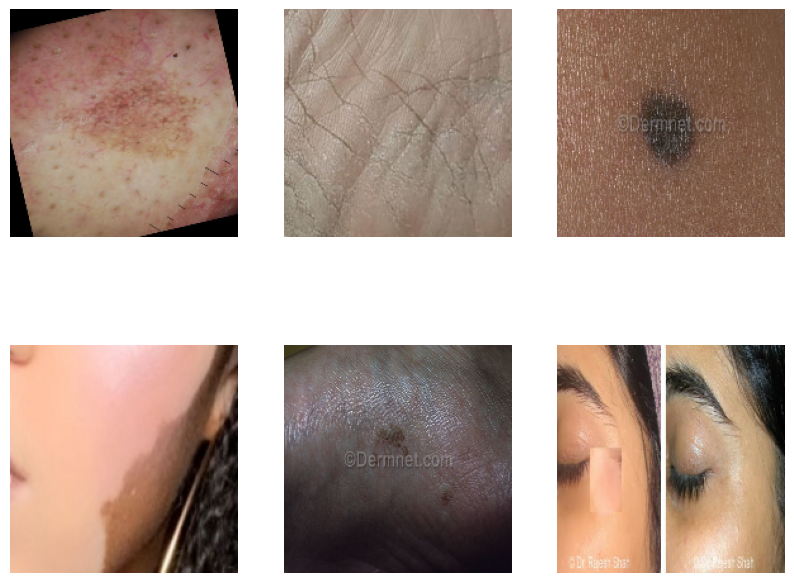

In [12]:
example_list = [image for image in random.sample(images, k=6)]


fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

In [13]:
label=train['target']

In [14]:
len(label)

7330

In [15]:
len(images)

7330

In [16]:
import numpy as np
import pandas as pd

In [17]:
data=np.array(images)

In [18]:
label=np.array(label)

In [19]:
data.shape

(7330, 180, 180, 3)

In [20]:
label.shape

(7330,)

In [22]:
#install the sklearn_relief module
!pip install sklearn_relief


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

In [24]:
for layer in vgg_model.layers : 
    layer.trainable = False

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [27]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [28]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [29]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 3)

In [33]:
import keras
acc=[]
num_classes=6
label=keras.utils.to_categorical(label,num_classes)

In [34]:
label.shape

(7330, 6)

In [35]:
for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)

(5864, 180, 180, 3)
46/46 [==============================] - 293s 6s/step
(5864, 5, 5, 512)
5864
1466
(5864, 12800)
(5864, 12800)
(5864, 180, 180, 3)
46/46 [==============================] - 313s 7s/step
(5864, 5, 5, 512)
5864
1466
(5864, 12800)
(5864, 12800)
(5864, 180, 180, 3)
46/46 [==============================] - 293s 6s/step
(5864, 5, 5, 512)
5864
1466
(5864, 12800)
(5864, 12800)


In [36]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
184/184 [==============================] - 8s 32ms/step - loss: 1.9792 - accuracy: 0.7028
Epoch 2/25
184/184 [==============================] - 6s 31ms/step - loss: 0.4407 - accuracy: 0.8562
Epoch 3/25
184/184 [==============================] - 6s 31ms/step - loss: 0.3292 - accuracy: 0.9045
Epoch 4/25
184/184 [==============================] - 6s 31ms/step - loss: 0.1861 - accuracy: 0.9413
Epoch 5/25
184/184 [==============================] - 6s 31ms/step - loss: 0.1730 - accuracy: 0.9541
Epoch 6/25
184/184 [==============================] - 6s 30ms/step - loss: 0.1474 - accuracy: 0.9632
Epoch 7/25
184/184 [==============================] - 6s 31ms/step - loss: 0.2636 - accuracy: 0.9439
Epoch 8/25
184/184 [==============================] - 6s 30ms/step - loss: 0.2376 - accuracy: 0.9497
Epoch 9/25
184/184 [==============================] - 6s 30ms/step - loss: 0.2166 - accuracy: 0.9533
Epoch 10/25
184/184 [==============================] - 6s 32ms/step - loss: 0.1003 - accura

In [37]:
model.save('6claass.h5')

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from mlxtend.plotting import plot_confusion_matrix

In [39]:
y_pred=model.predict(x_test)

46/46 [==============================] - 0s 6ms/step


In [40]:
y_pred2=np.argmax(y_pred,axis=1)
y_pred2

array([5, 4, 5, ..., 5, 1, 1], dtype=int64)

In [41]:
y_test=np.argmax(y_test,axis=1)

In [42]:
y_test

array([0, 4, 3, ..., 0, 1, 1], dtype=int64)

In [43]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

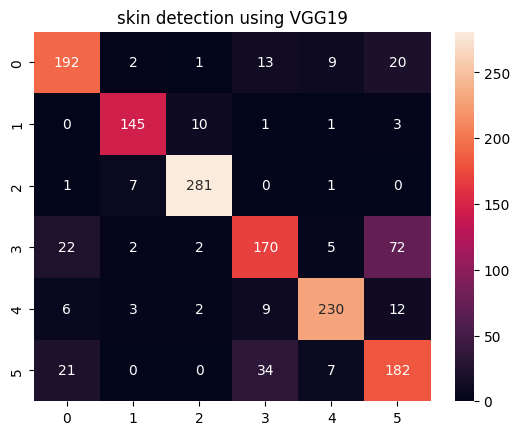

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
plt.title("skin detection using VGG19")

ax=plt.subplot()
sns.heatmap(confusion_matrix_result,annot=True,fmt='g',ax=ax);
pl.show()

In [46]:
train_accuracy = history.history['accuracy']

In [47]:
train_loss = history.history['loss']

In [48]:
epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

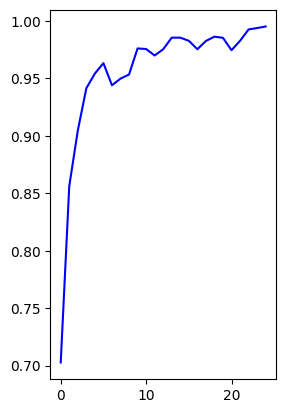

In [49]:
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

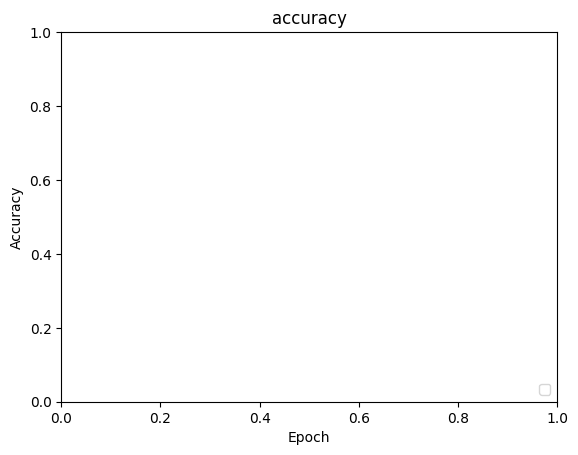

In [50]:
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')


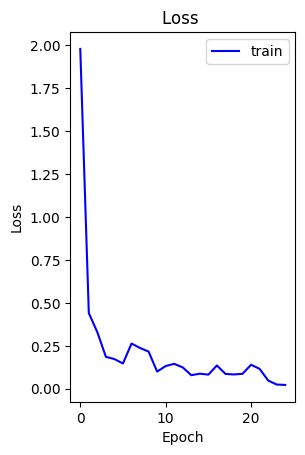

In [51]:
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [52]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [53]:
confusion_matrix=classification_report(y_test,y_pred2)

In [54]:
confusion_matrix=classification_report(y_test,y_pred2)

In [55]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       237
           1       0.91      0.91      0.91       160
           2       0.95      0.97      0.96       290
           3       0.75      0.62      0.68       273
           4       0.91      0.88      0.89       262
           5       0.63      0.75      0.68       244

    accuracy                           0.82      1466
   macro avg       0.82      0.82      0.82      1466
weighted avg       0.82      0.82      0.82      1466



In [56]:
import tensorflow as tf
import numpy as np
import cv2

import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img=vgg_model.predict(img)
    img=img.reshape(1,-1)
    
    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class = np.argmax(pred)

    return predicted_class


print(predict_skin_disease("skin/test/Normal/0_0_aidai_0029.jpg"))

1/1 [==============================] - 0s 100ms/step
2


In [57]:
print(y_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


In [63]:
import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):

    class_names = ["Acne","Eczema","Atopic","Psoriasis","Tinea","vitiligo"]

    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img = vgg_model.predict(img)
    img = img.reshape(1, -1)

    pred = model.predict(img)[0]
    predicted_class_index = np.argmax(pred)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name
print(predict_skin_disease("dermnet/test/Atopic Dermatitis Photos/03ichthyosis050127.jpg"))

with open('predict_skin_disease.pkl', 'wb') as file:
    pickle.dump(predict_skin_disease, file)

1/1 [==============================] - 0s 110ms/step
Atopic
